In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df.head(5)

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-01-01,531,1.0,12,35,1,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,3721000
1,1,2011-01-01,385,2.0,15,46,1,2,15.0,1.0,...,0,0,0,0,0,0,0,0,0,7431000
2,2,2011-01-01,51,0.0,1,53,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,3081000
3,3,2011-01-01,76,0.0,1,60,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,3847000
4,4,2011-01-01,114,0.0,2,43,2,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,2323000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
id            100000 non-null int64
date          100000 non-null object
street_id     100000 non-null int64
build_tech    100000 non-null float64
floor         100000 non-null int64
area          100000 non-null int64
rooms         100000 non-null int64
balcon        100000 non-null int64
metro_dist    100000 non-null float64
g_lift        69888 non-null float64
n_photos      100000 non-null int64
kw1           100000 non-null int64
kw2           100000 non-null int64
kw3           100000 non-null int64
kw4           100000 non-null int64
kw5           100000 non-null int64
kw6           100000 non-null int64
kw7           100000 non-null int64
kw8           100000 non-null int64
kw9           100000 non-null int64
kw10          100000 non-null int64
kw11          100000 non-null int64
kw12          100000 non-null int64
kw13          100000 non-null int64
price         100000

## Год подачи объявления

In [6]:
df['year'] = df['date'].map(lambda x: int(str(x).split('-')[0]) )

In [6]:
(df.groupby('year').price.mean() )#цены растут с годами в целом?

year
2011    4.798278e+06
2012    5.356587e+06
Name: price, dtype: float64

Cредний множитель роста цены =  1.1200116116981818


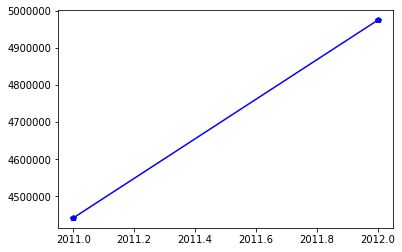

In [7]:
#без выбросов по площади
X, Y =[] , []
for year, frame in df[df.area<=90].groupby('year'):
    X.append(int(year) )
    Y.append( frame.price.mean() )
    
plt.plot(X, Y, 'bp-');
coeff = Y[1]/Y[0]
print('Cредний множитель роста цены = ', coeff)

Cредний множитель роста цены =  1.1072746910008002


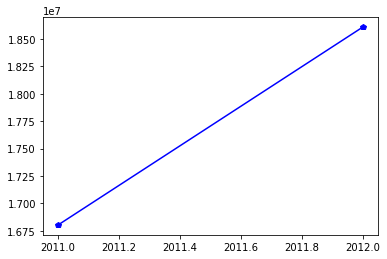

In [8]:
#для выбросов по площади
X, Y =[] , []
for year, frame in df[df.area>90].groupby('year'):
    X.append(int(year) )
    Y.append( frame.price.mean() )
    
plt.plot(X, Y, 'bp-');
coeff_x = Y[1]/Y[0]
print('Cредний множитель роста цены = ', coeff_x)

In [10]:
df[['year', 'price']].corr()

,year,price
year,1.000000,0.065873
price,0.065873,1.000000


## Месяц подачи объявления

In [9]:
df['month'] = df['date'].map(lambda x: int(str(x).split('-')[1]) )

In [12]:
(df.groupby('month').price.mean() )#цены зависят от месяца?

month
1     4.951815e+06
2     4.996210e+06
3     4.870921e+06
4     5.008361e+06
5     5.079901e+06
6     5.113853e+06
7     4.698624e+06
8     4.814908e+06
9     4.864077e+06
10    5.026292e+06
11    5.018467e+06
12    5.242515e+06
Name: price, dtype: float64

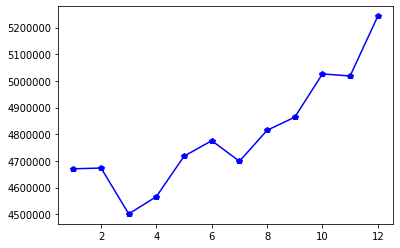

In [13]:
X, Y =[] , []
for month, frame in df[df.year==2011].groupby('month'):
    X.append(int(month) )
    Y.append( frame.price.mean() )
    
plt.plot(X, Y, 'bp-');

In [14]:
df[['month', 'price']].corr()

,month,price
month,1.000000,0.006428
price,0.006428,1.000000


In [10]:
def cat_to_num(data):
    categories = range(1,13)
    features = {}
    for cat in categories:
        binary = (data == cat)
                
        features['month_'+str(cat)] = binary.astype('int')
    return pd.DataFrame(features)

df = df.join(cat_to_num(df['month'])) 

In [16]:
df.head(3)

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,2011-01-01,531,NaN,12,35,1,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,2011-01-01,385,2.0,15,46,1,2,15.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,2011-01-01,51,0.0,1,53,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df = df.drop('month', axis = 1)

## Номер этажа в доме?

In [18]:
df[['floor', 'price']].corr()

,floor,price
floor,1.000000,0.210676
price,0.210676,1.000000


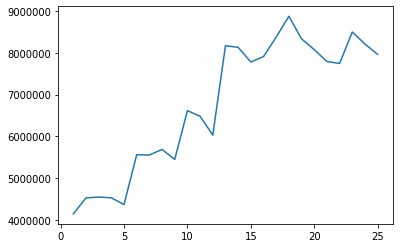

In [19]:
X, Y =[] , []
for floor, frame in df.groupby('floor'):
    X.append(int(floor) )
    Y.append( frame.price.mean() )
plt.plot(X, Y); # можно сказать, чем выше этаж, тем выше цена?

In [20]:
df[['floor', 'price']].corr()

,floor,price
floor,1.000000,0.210676
price,0.210676,1.000000


## Расстояние до метро

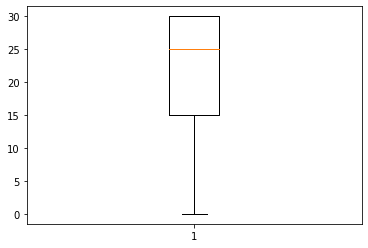

In [21]:
plt.boxplot(df.metro_dist[df.metro_dist >=0 ]); #выбросов нет - можно использовать для заполнения среднее значение

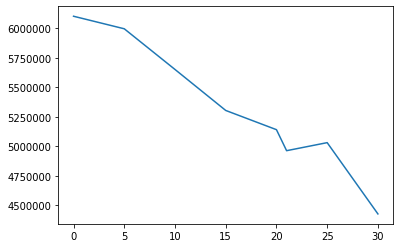

In [11]:
X, Y =[] , []
for dist, frame in df.groupby('metro_dist'):
    X.append(int(dist) )
    Y.append( frame.price.mean() )
    
plt.plot(X, Y); #Чем дальше от метро, тем дешевле?

In [12]:
df[['metro_dist', 'price']].corr()

,metro_dist,price
metro_dist,1.000000,-0.119341
price,-0.119341,1.000000


## Наличие лифта

In [25]:
df['g_lift'] = df.g_lift.fillna(0)

## Площадь квартиры

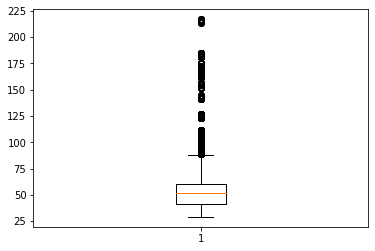

In [26]:
plt.boxplot(df['area']); #выбросы

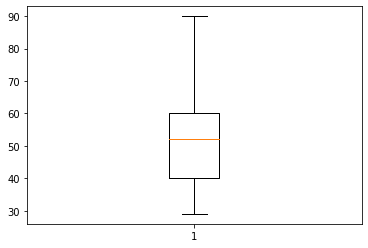

In [27]:
plt.boxplot(df[ df.area <= 90 ].area); #если обрезать выбросы

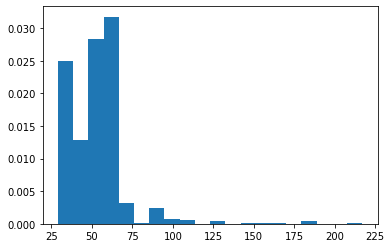

In [28]:
plt.hist(df.area,bins=20, density=True);

## Есть дорогие улицы, а есть дешевые
произведем бинаризацию

In [13]:
def cat_to_num(data):
    categories = pd.unique(data)
    features = {}
    for cat in categories:
        binary = (data == cat)
        features['street_'+str(cat)] = binary.astype('int')
    return pd.DataFrame(features)

df = df.join(cat_to_num(df['street_id']))     

In [14]:
# просто дропнем всё, что больше 90???
#df_extremes = df[df.area > 90]
df = df[df.area <= 90]

In [31]:
df_extremes.shape

(2861, 710)

In [15]:
df.shape

(97139, 711)

# Попробуем учить на разных годах отдельно

In [16]:
df_2011 = df[df.year==2011]

In [17]:
df_2012 = df[df.year==2012]

In [18]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [30]:
train, test = train_test_split(df_2011, test_size = 0.3, random_state=7)

In [39]:
features = list(set(df.columns) - set(['id', 'year', 'price', 'street_id', 'g_lift','date', 'kw13']))

In [24]:
len(features)

705

## Учим на 11м проверяем на 12м

In [40]:
lgb_data_train = lgb.Dataset(df_2011[features].values, df_2011['price'])
lgb_data_test = lgb.Dataset(df_2012[features].values, df_2012['price'])

In [41]:
params = {
    'objective':'regression', 
    'metric': 'mae',
    'learning_rate': 0.11, 
    'nthread': 4,
    'reg_alpha': 38
}

In [42]:
model_2011 = lgb.train(params, lgb_data_train, 
                  valid_sets=[lgb_data_train, lgb_data_test],
                  num_boost_round=5000,
                  early_stopping_rounds=100, verbose_eval=40)

Training until validation scores don't improve for 100 rounds
[40]	training's l1: 1.23836e+06	valid_1's l1: 1.47121e+06
[80]	training's l1: 1.00429e+06	valid_1's l1: 1.26358e+06
[120]	training's l1: 870303	valid_1's l1: 1.14895e+06
[160]	training's l1: 790674	valid_1's l1: 1.09195e+06
[200]	training's l1: 738988	valid_1's l1: 1.06254e+06
[240]	training's l1: 701965	valid_1's l1: 1.04448e+06
[280]	training's l1: 673445	valid_1's l1: 1.0318e+06
[320]	training's l1: 650774	valid_1's l1: 1.0228e+06
[360]	training's l1: 632349	valid_1's l1: 1.01563e+06
[400]	training's l1: 617052	valid_1's l1: 1.01003e+06
[440]	training's l1: 603820	valid_1's l1: 1.00614e+06
[480]	training's l1: 592939	valid_1's l1: 1.00347e+06
[520]	training's l1: 583715	valid_1's l1: 1.00126e+06
[560]	training's l1: 574906	valid_1's l1: 999113
[600]	training's l1: 567616	valid_1's l1: 997093
[640]	training's l1: 561466	valid_1's l1: 996270
[680]	training's l1: 555783	valid_1's l1: 995766
[720]	training's l1: 550328	valid_

In [43]:
#506 987 0.11 38

In [28]:
from sklearn.metrics import mean_absolute_error as MAE

In [44]:
MAE(df_2012['price'], model_2011.predict(df_2012[features])*coeff)

703975.3107975255

## Учим на 12м проверяем на 11м

In [31]:
lgb_data_train = lgb.Dataset(df_2012[features].values, df_2012['price'])
lgb_data_test = lgb.Dataset(df_2011[features].values, df_2011['price'])

In [32]:
params2 = {
    'objective':'regression', 
    'metric': 'mae',
    'learning_rate': 0.11, 
    'nthread': 4,
    'reg_alpha': 45
}

In [33]:
model_2012 = lgb.train(params2, lgb_data_train, 
                  valid_sets=[lgb_data_train, lgb_data_test],
                  num_boost_round=5000,
                  early_stopping_rounds=100, verbose_eval=40)

Training until validation scores don't improve for 100 rounds
[40]	training's l1: 1.36332e+06	valid_1's l1: 1.32036e+06
[80]	training's l1: 1.10446e+06	valid_1's l1: 1.09814e+06
[120]	training's l1: 962406	valid_1's l1: 991573
[160]	training's l1: 877245	valid_1's l1: 932023
[200]	training's l1: 820659	valid_1's l1: 893756
[240]	training's l1: 781094	valid_1's l1: 869112
[280]	training's l1: 751342	valid_1's l1: 849946
[320]	training's l1: 728015	valid_1's l1: 837784
[360]	training's l1: 709671	valid_1's l1: 829554
[400]	training's l1: 695208	valid_1's l1: 823604
[440]	training's l1: 681755	valid_1's l1: 816936
[480]	training's l1: 670742	valid_1's l1: 812329
[520]	training's l1: 660678	valid_1's l1: 810467
[560]	training's l1: 652128	valid_1's l1: 807531
[600]	training's l1: 644724	valid_1's l1: 805420
[640]	training's l1: 637237	valid_1's l1: 803131
[680]	training's l1: 630896	valid_1's l1: 802041
[720]	training's l1: 625453	valid_1's l1: 800766
[760]	training's l1: 619756	valid_1's 

In [ ]:
587 815 0.11 45

In [34]:
MAE(df_2011['price'], model_2012.predict(df_2011[features])/coeff)

657744.5084432996

In [38]:
pd.DataFrame({'name': features, 
              'importance': model_2011.feature_importance()}).sort_values('importance', ascending=False)

,name,importance
112,area,6759
35,floor,2566
319,metro_dist,2365
466,month,2060
261,build_tech,1875
508,n_photos,1650
540,balcon,789
64,kw2,630
344,rooms,490
139,street_396,178


In [142]:
impot_2012.tail(100)

,name,importance
668,street_658,11
508,street_169,11
434,street_278,11
349,street_31,11
696,street_115,11
57,street_347,11
570,street_180,11
588,street_365,11
355,street_220,10
234,street_397,10


# Вернемся к выбросам

/home/pavel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
/home/pavel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([9.39871958e-09, 3.99002246e-08, 4.80576039e-08, 3.56442007e-08,
        1.64920928e-08, 7.80271059e-09, 5.14269562e-09, 1.59600898e-09,
        8.86671658e-10, 3.54668663e-10]),
 array([ 1000000.,  7050500., 13101000., 19151500., 25202000., 31252500.,
        37303000., 43353500., 49404000., 55454500., 61505000.]),
 <a list of 10 Patch objects>)

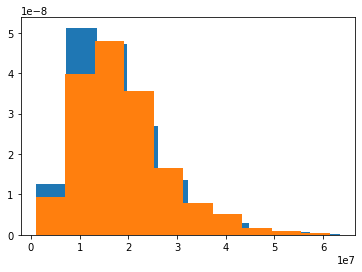

In [157]:
plt.hist(df_extremes[df_extremes.year==2011].price, normed=True)
plt.hist(df_extremes[df_extremes.year==2012].price, normed=True)

In [159]:
df_extremes.groupby('year').price.mean()

year
2011    1.680434e+07
2012    1.860702e+07
Name: price, dtype: float64

In [163]:
import sklearn.ensemble

In [241]:
train, test = train_test_split(df_extremes, test_size = 0.2, random_state=7)

In [258]:
params3 = {
    'objective':'regression', 
    'metric': 'mae',
    'learning_rate': 0.01, 
    'nthread': 4,
    'reg_lambda': 2
}

In [262]:
mdl_extremes = lgb.train(params3, lgb_data_train,
                  valid_sets=[lgb_data_train, lgb_data_test],
                  num_boost_round=5000,
                  early_stopping_rounds=50, verbose_eval=40)

Training until validation scores don't improve for 50 rounds
[40]	training's l1: 6.15506e+06	valid_1's l1: 6.28075e+06
[80]	training's l1: 5.77689e+06	valid_1's l1: 5.97907e+06
[120]	training's l1: 5.57039e+06	valid_1's l1: 5.83847e+06
[160]	training's l1: 5.43824e+06	valid_1's l1: 5.75451e+06
[200]	training's l1: 5.34625e+06	valid_1's l1: 5.71387e+06
[240]	training's l1: 5.27974e+06	valid_1's l1: 5.71294e+06
Early stopping, best iteration is:
[213]	training's l1: 5.32345e+06	valid_1's l1: 5.70936e+06


In [261]:
lgb_data_train = lgb.Dataset(train[priznaki].values, train['price'])
lgb_data_test = lgb.Dataset(test[priznaki].values, test['price'])

In [260]:
priznaki = ['area', 'rooms', 'floor', 'metro_dist', 'n_photos', 'build_tech']

In [218]:
df_extremes.build_tech = df_extremes.build_tech.fillna(1.0)

In [236]:
mdl_2011.fit(df_extremes[priznaki],
             df_extremes.price)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [225]:
mdl_2011.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 3.15135811e-04, 0.00000000e+00,
       0.00000000e+00, 2.24761276e-04, 1.59089778e-03, 0.00000000e+00,
       8.40610939e-04, 3.31363475e-04, 0.00000000e+00, 7.76239316e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.22557377e-04, 0.00000000e+00,
       8.06840582e-06, 0.00000000e+00, 5.27672741e-04, 4.87781214e-04,
       0.00000000e+00, 2.08986963e-03, 0.00000000e+00, 5.21131949e-05,
       1.02472590e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.93406701e-04, 1.13071659e-04,
       4.42634724e-04, 0.00000000e+00, 0.00000000e+00, 1.40566085e-04,
       0.00000000e+00, 2.33993657e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.47148998e-03, 5.04731858e-03, 4.48753820e-02, 0.00000000e+00,
      

In [232]:
priznaki = pd.DataFrame({'name': features, 
              'importance': mdl_2011.feature_importances_}).sort_values('importance', ascending=False).iloc[:100,:].name.values

In [237]:
MAE(df_extremes.price, mdl_2011.predict(
                                        df_extremes[priznaki])
)

1687183.9230164278

In [151]:
tmp =[ 17391580.566235583 for i in range(len(df_extremes.price.values))]

In [152]:
MAE(df_extremes.price, tmp)

6854588.198312564

In [112]:
model_extremes.fit(df_extremes[features][df_extremes.year==2011].values, df_extremes['price'][df_extremes.year==2011])

/home/pavel/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:55:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
        colsample_bytree=1, eval_metric='mae', gamma=0, learning_rate=1,
        max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
        n_estimators=100, n_jobs=4, nthread=None, objective='reg:linear',
        random_state=0, reg_alpha=30, reg_lambda=1, scale_pos_weight=1,
        seed=None, silent=None, subsample=0.8, verbosity=1)

In [113]:
MAE( df_extremes['price'][df_extremes.year==2011],
    model_extremes.predict(df_extremes[features][df_extremes.year==2011].values)   )


4926467.2921202695

In [117]:
import sklearn.ensemble

In [187]:
model_extremes = sklearn.ensemble.GradientBoostingRegressor(learning_rate=1, n_estimators=120, alpha=0.9, max_depth=6)

In [188]:
model_extremes.fit(df_extremes[features][df_extremes.year==2011].values, df_extremes['price'][df_extremes.year==2011])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [108]:
from sklearn.metrics import mean_absolute_error as MAE

In [189]:
MAE( df_extremes['price'][df_extremes.year==2011], model_extremes.predict(df_extremes[features][df_extremes.year==2011].values)   )

237778.80214548123

In [190]:
MAE( df_extremes['price'][df_extremes.year==2012], 
    model_extremes.predict(df_extremes[features][df_extremes.year==2012].values)   )

4293085.376217263

In [125]:
df_extremes[['area','price']].corr()

,area,price
area,1.000000,0.488876
price,0.488876,1.000000


# Без учета коэффициента роста цен --- гораздо хуже!

In [32]:
MAE(df_2012.price, model.predict(df_2012[features]))

1193835.8136062634

In [36]:
MAE(df_2012.price, model.predict(df_2012[features])*1.1163561753394984)

745206.2845102939

In [166]:
df_extremes.groupby('year').price.mean()

year
2011    1.680434e+07
2012    1.860702e+07
Name: price, dtype: float64

In [167]:
 1.860702e+07/1.680434e+07

1.1072746683297292

In [6]:
len(pd.unique(df.street_id.values))

672

In [7]:
def cat_to_num(data):
    categories = pd.unique(data)
    features = {}
    for cat in categories:
        binary = (data == cat)
        features['street_'+str(cat)] = binary.astype('int')
    return pd.DataFrame(features)

df = df.join(cat_to_num(df['street_id']))      

In [31]:
#df[df.month_03.astype(bool)]

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
11000,11000,2011-03-01,364,0.0,9,34,1,0,30.0,0.0,...,1,0,0,0,0,0,0,0,0,0
11001,11001,2011-03-01,23,0.0,5,45,2,0,25.0,0.0,...,1,0,0,0,0,0,0,0,0,0
11002,11002,2011-03-01,96,0.0,2,33,1,0,NaN,0.0,...,1,0,0,0,0,0,0,0,0,0
11003,11003,2011-03-01,18,NaN,5,50,2,1,30.0,1.0,...,1,0,0,0,0,0,0,0,0,0
11004,11004,2011-03-01,191,1.0,1,52,2,0,10.0,0.0,...,1,0,0,0,0,0,0,0,0,0
11005,11005,2011-03-01,36,1.0,2,35,1,1,5.0,1.0,...,1,0,0,0,0,0,0,0,0,0
11006,11006,2011-03-01,437,0.0,5,59,3,0,25.0,NaN,...,1,0,0,0,0,0,0,0,0,0
11007,11007,2011-03-01,655,0.0,8,41,1,0,15.0,1.0,...,1,0,0,0,0,0,0,0,0,0
11008,11008,2011-03-01,468,0.0,5,31,1,0,20.0,0.0,...,1,0,0,0,0,0,0,0,0,0
11009,11009,2011-03-01,342,0.0,1,33,1,0,NaN,0.0,...,1,0,0,0,0,0,0,0,0,0


In [68]:
df['g_lift'] = df['g_lift'].fillna(0.0)

In [7]:
from sklearn.preprocessing import RobustScaler
X = df.iloc[:, 5:6].values
df['area'] = RobustScaler().fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [36]:
train, test = train_test_split(df, random_state=7)
#train = df

In [75]:
features = list(set(df.columns) - set(['price', 'build_tech', 'street_id', 'date', 'g_lift']) -set(trash))
#features = ['street_id', 'area', 'id', 'metro_dist', 'floor', 'n_photos','balcon', 'kw2', 'rooms']

In [76]:
features

['area',
 'street_130',
 'floor',
 'kw2',
 'id',
 'metro_dist',
 'street_396',
 'n_photos',
 'balcon',
 'street_602',
 'rooms',
 'street_320']

In [77]:
lgb_data_train = lgb.Dataset(train[features].values, train['price'])
lgb_data_test = lgb.Dataset(test[features].values, test['price'])

In [85]:
params = {
    'objective':'regression', 
    'metric': 'mae',
    'learning_rate': 0.05, 
    'nthread': 4,
    'reg_lambda': 10
}

In [87]:
model = lgb.train(params, lgb_data_train, 
                  valid_sets=[lgb_data_test, lgb_data_train],
                  num_boost_round=4000,
                  early_stopping_rounds=100, verbose_eval=40)

Training until validation scores don't improve for 100 rounds
[40]	training's l1: 1.70452e+06	valid_0's l1: 1.70259e+06
[80]	training's l1: 1.61138e+06	valid_0's l1: 1.61937e+06
[120]	training's l1: 1.58929e+06	valid_0's l1: 1.60547e+06
[160]	training's l1: 1.57795e+06	valid_0's l1: 1.60219e+06
[200]	training's l1: 1.56974e+06	valid_0's l1: 1.60058e+06
[240]	training's l1: 1.56335e+06	valid_0's l1: 1.6006e+06
[280]	training's l1: 1.55825e+06	valid_0's l1: 1.60085e+06
[320]	training's l1: 1.55307e+06	valid_0's l1: 1.60076e+06
Early stopping, best iteration is:
[229]	training's l1: 1.56513e+06	valid_0's l1: 1.60044e+06


In [ ]:
734 0.05
718 0.12

In [42]:
impt = pd.DataFrame({'name': features, 
              'importance': model.feature_importance()}).sort_values('importance', ascending=False)

In [73]:
trash = impt[impt.importance < 200].name.values

In [8]:
X_clusters = df.iloc[:, 11:24].values

In [9]:
X_clusters

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_clusters)

/home/pavel/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/pavel/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
silh_score = []

for k in range(2, 8):
    model = KMeans(n_clusters=k, random_state=7)
    model.fit(X_norm)
    
    silh_score.append(
        silhouette_score(X_norm, model.labels_)
    )
    print(k)

2
3
4
5
6
7


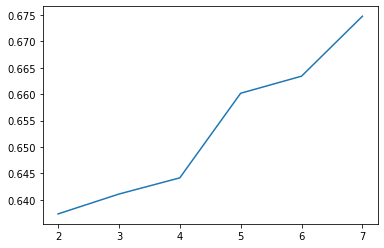

In [19]:
plt.plot(range(2, 8), silh_score)

In [20]:
print(silh_score)

[0.6373362333066732, 0.64109507746718, 0.6441575010597932, 0.6601643523048828, 0.6633959417700405, 0.6747356344512722]


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
id            100000 non-null int64
date          100000 non-null object
street_id     100000 non-null int64
build_tech    69891 non-null float64
floor         100000 non-null int64
area          100000 non-null int64
rooms         100000 non-null int64
balcon        100000 non-null int64
metro_dist    100000 non-null float64
g_lift        69888 non-null float64
n_photos      100000 non-null int64
kw1           100000 non-null int64
kw2           100000 non-null int64
kw3           100000 non-null int64
kw4           100000 non-null int64
kw5           100000 non-null int64
kw6           100000 non-null int64
kw7           100000 non-null int64
kw8           100000 non-null int64
kw9           100000 non-null int64
kw10          100000 non-null int64
kw11          100000 non-null int64
kw12          100000 non-null int64
kw13          100000 non-null int64
price         100000 

In [5]:
df.build_tech.value_counts()

0.0    35401
1.0    31173
2.0     3317
Name: build_tech, dtype: int64

In [6]:
df.g_lift.value_counts()

0.0    35075
1.0    34813
Name: g_lift, dtype: int64

In [11]:
tmp = df.price.mean()

In [12]:
y_pred = [tmp for i in range(100000)]

In [112]:
from sklearn.metrics import mean_absolute_error

In [14]:
mean_absolute_error(df.price, y_pred)

2615806.4346721997

In [32]:
df['metro_dist'] = df['metro_dist'].fillna(
                                        df.metro_dist.mean()
                                        )

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
id            100000 non-null int64
date          100000 non-null object
street_id     100000 non-null int64
build_tech    69891 non-null float64
floor         100000 non-null int64
area          100000 non-null int64
rooms         100000 non-null int64
balcon        100000 non-null int64
metro_dist    100000 non-null float64
g_lift        69888 non-null float64
n_photos      100000 non-null int64
kw1           100000 non-null int64
kw2           100000 non-null int64
kw3           100000 non-null int64
kw4           100000 non-null int64
kw5           100000 non-null int64
kw6           100000 non-null int64
kw7           100000 non-null int64
kw8           100000 non-null int64
kw9           100000 non-null int64
kw10          100000 non-null int64
kw11          100000 non-null int64
kw12          100000 non-null int64
kw13          100000 non-null int64
price         100000 

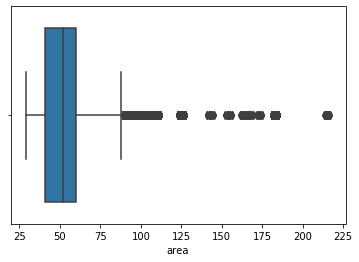

In [45]:
sns.boxplot(df['area']) #выбросы по площади - есть!

In [108]:
from sklearn.preprocessing import RobustScaler
X = df.iloc[:, 5:6].values
df['area'] = RobustScaler().fit_transform(X)

In [55]:
df[['area', 'price']].corr()

,area,price
area,1.00000,0.68665
price,0.68665,1.00000


# Линейная регрессия для площади

In [28]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression(normalize=True)

In [117]:
mean_absolute_error(test['price'], LR_model.predict(test.iloc[:, 5:6].values ) )

1986962.985232261

In [77]:
test['LinR'] = LR_model.predict(test.iloc[:, 5:6].values)
train['LinR'] = LR_model.predict(train.iloc[:, 5:6].values)

/home/pavel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/pavel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# ВЗГЛЯНИМ НА ТЕСТОВУЮ ВЫБОРКУ

In [45]:
df_pred = pd.read_csv('data/test.csv')

In [46]:
df_pred.head(3)

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,pred_build_tech
0,100000,2012-06-01,427,1.0,9,60,3,1,30.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
1,100001,2012-06-01,593,1.0,7,52,2,1,20.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
2,100002,2012-06-01,91,0.0,4,58,3,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,0.0


In [47]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
id                 100000 non-null int64
date               100000 non-null object
street_id          100000 non-null int64
build_tech         100000 non-null float64
floor              100000 non-null int64
area               100000 non-null int64
rooms              100000 non-null int64
balcon             100000 non-null int64
metro_dist         100000 non-null float64
g_lift             69812 non-null float64
n_photos           100000 non-null int64
kw1                100000 non-null int64
kw2                100000 non-null int64
kw3                100000 non-null int64
kw4                100000 non-null int64
kw5                100000 non-null int64
kw6                100000 non-null int64
kw7                100000 non-null int64
kw8                100000 non-null int64
kw9                100000 non-null int64
kw10               100000 non-null int64
kw11               1000

## Расстояние до метро

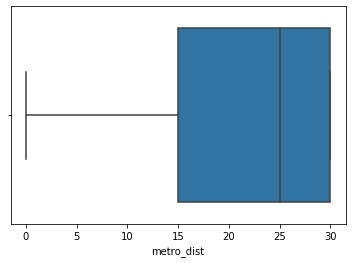

In [50]:
sns.boxplot(df_pred.metro_dist) #выбросов по расстоянию до метро - нет!

## Что по годам?

In [51]:
df_pred['year'] = df_pred['date'].map(lambda x: int(str(x).split('-')[0]) )

In [52]:
df_pred.year.value_counts()

2013    66762
2012    33238
Name: year, dtype: int64

## А что с площадью

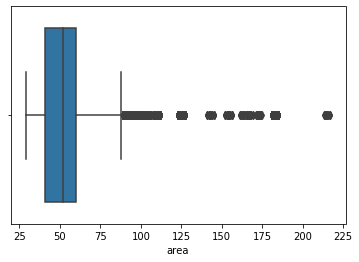

In [53]:
sns.boxplot(df_pred.area) #выбросы

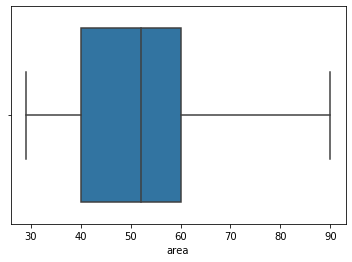

In [147]:
sns.boxplot(df_pred[df_pred.area<=90].area) #выбросы

In [23]:
df_pred[df_pred.area<=90].area.count() #выбросов столькоже как и в тренировке

97139

# Бинаризуем, что надо

In [54]:
df_pred['month'] = df_pred['date'].map(lambda x: int(str(x).split('-')[1]) )

In [55]:
def cat_to_num(data):
    categories = range(1,13)
    features = {}
    for cat in categories:
        binary = (data == cat)
                
        features['month_'+str(cat)] = binary.astype('int')
    return pd.DataFrame(features)

df_pred = df_pred.join(cat_to_num(df_pred['month'])) 

In [269]:
df_pred=df_pred.drop('month', axis=1)

In [56]:
def cat_to_num(data):
    categories = pd.unique(data)
    features = {}
    for cat in categories:
        binary = (data == cat)
        features['street_'+str(cat)] = binary.astype('int')
    return pd.DataFrame(features)

df_pred = df_pred.join(cat_to_num(df_pred['street_id']))   

In [57]:
df_pred['price_2011'] = model_2011.predict(df_pred[features])

In [58]:
df_pred['price_2012'] = model_2012.predict(df_pred[features])

In [60]:
coeff

1.1200116116981818

In [59]:
def f(x):
    if (x['year'] == 2012): return int( (x['price_2012'] + x['price_2011']*coeff)/2.0)
    else: return int( (x['price_2012']*coeff + x['price_2011']*coeff*coeff)/2.0 )
        
df_pred['price_new'] = df_pred.apply(lambda x: f(x), axis=1)

In [61]:
X = pd.read_csv('pred/y_pred_ex5.csv')

In [62]:
X=X.price.values

In [63]:
df_pred['price_old']=X

In [67]:
def f(x):
    if (x['area'] > 90): return int(x['price_old'])
    else: return int( (0.1*x['price_new'] + 0.9*x['price_old'])/2.0 )
        
df_pred['price'] = df_pred.apply(lambda x: f(x), axis=1)

In [154]:
df_pred['price2'] = model_extremes.predict(df_pred[features])

In [164]:
def f(x):
    if (x['area'] > 90) :
        if (x['year'] == 2012): return int(x['price2'])
        else: return int(x['price2']*1.107)
    else:
        if (x['year'] == 2012): return int(x['price1'])
        else: return int(x['price1']*1.116)
        
df_pred['price'] = df_pred.apply(lambda x: f(x), axis=1)

In [66]:
df_pred

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,street_106,street_549,street_367,street_476,street_484,price_2011,price_2012,price_new,price_old,price
0,100000,2012-06-01,427,1.0,9,60,3,1,30.000000,0.0,...,0,0,0,0,0,3.697140e+06,7.489636e+06,5815237,4125379,4970308
1,100001,2012-06-01,593,1.0,7,52,2,1,20.000000,0.0,...,0,0,0,0,0,8.631632e+06,1.047539e+07,10071460,9820409,9945934
2,100002,2012-06-01,91,0.0,4,58,3,0,30.000000,NaN,...,0,0,0,0,0,3.115727e+06,6.340720e+06,4915185,3396214,4155699
3,100003,2012-06-01,224,1.0,8,60,3,1,30.000000,0.0,...,0,0,0,0,0,6.744949e+06,9.316395e+06,8435408,7786256,8110832
4,100004,2012-06-01,426,0.0,2,54,3,0,30.000000,1.0,...,0,0,0,0,0,1.379421e+06,6.544122e+06,4044544,1415864,2730204
5,100005,2012-07-01,1,0.0,9,34,1,0,30.000000,0.0,...,0,0,0,0,0,1.619489e+06,6.049933e+06,3931889,1795980,2863934
6,100006,2012-07-01,203,0.0,3,58,3,0,21.940492,0.0,...,0,0,0,0,0,6.228328e+06,6.158070e+06,6566935,6928858,6747896
7,100007,2012-07-01,6,0.0,4,41,2,0,30.000000,1.0,...,0,0,0,0,0,2.787428e+06,4.671567e+06,3896759,2959300,3428029
8,100008,2012-07-01,267,0.0,12,63,3,0,25.000000,1.0,...,0,0,0,0,0,2.049457e+06,8.224727e+06,5260070,2481145,3870607
9,100009,2012-07-01,135,1.0,3,52,2,1,20.000000,1.0,...,0,0,0,0,0,4.331741e+06,7.911872e+06,6381735,4849858,5615796


In [68]:
df_pred[["id", "price"]].to_csv("pred/y_pred_alpha2.csv", index=False)

!cat pred/y_pred_alpha2.csv | head

id,price
100000,2147182
100001,4922757
100002,1774055
100003,3925585
100004,839366
100005,1004785
100006,3446332
100007,1526522
100008,1379518
cat: ошибка записи: Обрыв канала
